---

#  Top Games on Google Playstore - EDA

---

 - In this study, we aimed to make an Exploratory Data Analysis (EDA) by using Top Games on Google Playstore dataset with very terse but clear explanations.

---

- We are going to start by importing the libraries we will be using during the study and then can start to explore our dataset.

- We are going to use both Seaborn and Plotly to have variety of visualization options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

## Overview Stage 

- Read the csv
- Use necessary functions to get basic informations about the dataset

In [113]:
df = pd.read_csv('android-games.csv')

In [3]:
df.head()

rank                                         title  total ratings installs  \
0     1                Garena Free Fire- World Series       86273129  500.0 M   
1     2                        PUBG MOBILE - Traverse       37276732  500.0 M   
2     3                     Mobile Legends: Bang Bang       26663595  100.0 M   
3     4                                   Brawl Stars       17971552  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14464235  500.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0               4               2.1               6.9    0.0  GAME ACTION   
1               4               1.8               3.6    0.0  GAME ACTION   
2               4               1.5               3.2    0.0  GAME ACTION   
3               4               1.4               4.4    0.0  GAME ACTION   
4               4               0.8               1.5    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        63546766         4949507         3158756         2122183   
1        28339753         2164478         1253185          809821   
2        18777988         1812094         1050600          713912   
3        13018610         1552950          774012          406184   
4         9827328         2124154         1047741          380670   

   1 star ratings   paid  
0        12495915  False  
1         4709492  False  
2         4308998  False  
3         2219794  False  
4         1084340  False

- We basically can say that we have a dataset which is about top games in Google Playstore including the titles, average ratings, numbers of installation, ratings and the price of each game.

In [4]:
df.shape

(1730, 15)

- The dataset has 1730 rows and 15 columns.

- To have null values in a dataset and the number of null values have very crucial effect on analyzing.
- To be aware of the missing values, I would like to check the null values in the dataset.

In [14]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

- Even though having no null values in the dataset makes me very happy, it is very rare situatin in the ral world.
- Since it is kind of a dream dataset, let's enjoy it together :)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


- According to output of info function, since we have mainly integers and the floats as data types, I can say that we have a easy-to-analyze dataset.
- Another point which takes my attention immeadiately is that, even though 'installs' column exhibits the number of installation, it has object Dtype. 
- To avoid potential problems, we better change the type to integer or float.

In [16]:
df.describe()

rank  total ratings  average rating  growth (30 days)  \
count  1730.000000   1.730000e+03     1730.000000       1730.000000   
mean     50.386705   1.064332e+06        3.908092        321.735896   
std      28.936742   3.429250e+06        0.290973       6018.914507   
min       1.000000   3.299300e+04        2.000000          0.000000   
25%      25.000000   1.759992e+05        4.000000          0.100000   
50%      50.000000   4.286065e+05        4.000000          0.500000   
75%      75.000000   8.837970e+05        4.000000          1.700000   
max     100.000000   8.627313e+07        4.000000     227105.700000   

       growth (60 days)        price  5 star ratings  4 star ratings  \
count       1730.000000  1730.000000    1.730000e+03    1.730000e+03   
mean         122.554971     0.010942    7.622315e+05    1.164366e+05   
std         2253.891703     0.214987    2.538658e+06    3.021631e+05   
min            0.000000     0.000000    1.397500e+04    2.451000e+03   
25%            0.200000     0.000000    1.277300e+05    2.064300e+04   
50%            1.000000     0.000000    2.964340e+05    5.098050e+04   
75%            3.300000     0.000000    6.198358e+05    1.018140e+05   
max        69441.400000     7.490000    6.354677e+07    5.404966e+06   

       3 star ratings  2 star ratings  1 star ratings  
count    1.730000e+03    1.730000e+03    1.730000e+03  
mean     5.706307e+04    2.710336e+04    1.014950e+05  
std      1.495314e+05    8.154542e+04    4.083745e+05  
min      7.180000e+02    2.660000e+02    5.450000e+02  
25%      9.652500e+03    4.262250e+03    1.281200e+04  
50%      2.507800e+04    1.067550e+04    3.368600e+04  
75%      5.229500e+04    2.322875e+04    8.015725e+04  
max      3.158756e+06    2.122183e+06    1.249592e+07

To summarize what we have got so far ;
- We have got a dataset which has 1730 rows and 15 columns, about detailed information related top games on Google Playstore.
- Since we don't have any null values and most commonly have numeric values, we are not going to need to many adjustments.
- Even though it looks quite all right, to make an adjustment on the install column will make analyzing easier.
- Another point that we might need to take care is that price and paid column have a lot in common. Most likely to study with one od them is going to be enough, which means we should drop one of them.
- Just for further steps, to have in mind, we should be aware of the uneven distribution of the price column and the possible outliers on the rank column.

- Let's start with making making necessary adjustments. 

In [114]:
df['installs'].value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

In [115]:
def in_thousand(install):
    if install == '500.0 k':
        return '0.5 M'
    elif install == '100.0 k':
        return '0.1 M'
    else:
        return install

In [116]:
df['installs']= df['installs'].apply(in_thousand)

df['installs']= df['installs'].str.replace( 'M', '').str.strip().astype('float')

df= df.rename(columns={'installs': 'installs_in_million'})
df['installs_in_million'].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

- As a second step let's see the price and paid columns and decide which one is more necessary to continue with.

In [117]:
df['price'].value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [118]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

- When we look at the price of the games almost %99 percent is free and there is not much number of sample in different prices to compares them by price.
- Because of all this reason we can drop the price column since it doesn't have much to do with.
- For coming steps first we are going to drop the price column.
- Dropping a column or a row is one thing that we need to be very careful as making that decision.

In [119]:
df.drop('price', axis=1, inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   category             1730 non-null   object 
 8   5 star ratings       1730 non-null   int64  
 9   4 star ratings       1730 non-null   int64  
 10  3 star ratings       1730 non-null   int64  
 11  2 star ratings       1730 non-null   int64  
 12  1 star ratings       1730 non-null   int64  
 13  paid                 1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


- Let's move on to the **analysis part**.

## Analysis Part

- As a first step I will look at the game catogories.

In [121]:
df['category'].value_counts(normalize=True)

GAME CARD            0.072832
GAME WORD            0.060116
GAME ARCADE          0.057803
GAME EDUCATIONAL     0.057803
GAME RACING          0.057803
GAME ACTION          0.057803
GAME ROLE PLAYING    0.057803
GAME CASINO          0.057803
GAME ADVENTURE       0.057803
GAME BOARD           0.057803
GAME SPORTS          0.057803
GAME CASUAL          0.057803
GAME TRIVIA          0.057803
GAME STRATEGY        0.057803
GAME PUZZLE          0.057803
GAME MUSIC           0.057803
GAME SIMULATION      0.057803
Name: category, dtype: float64

- Even though many of thm have the same size, Game Card and the Game Word categories are little more than the others.

- For visualization I will be using both Seaborn and Plotly.

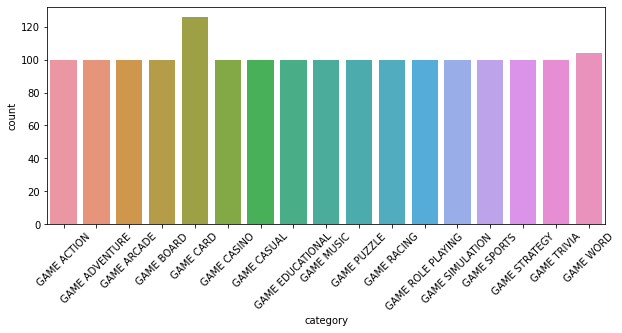

In [123]:
#with Seaborn

plt.figure(figsize=(10,4))
sns.countplot(x = "category", data = df)
plt.xticks(rotation = 45);

In [125]:
#withPlotly

fig = px.histogram(df, x="category", title='Game Categories')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- As we said before they all have almost the same size only the two categories are slightly more than the others.

## Total Ratings

In [127]:
df['total ratings'].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

- First thing drew my attention is the difference between mean and Q2.
- If we have a look at the max, we easily can say thay possible outliers caused that difference.
- Even though to see the outliers it is best way to use boxplot, I will be using both boxplot and the histogram.

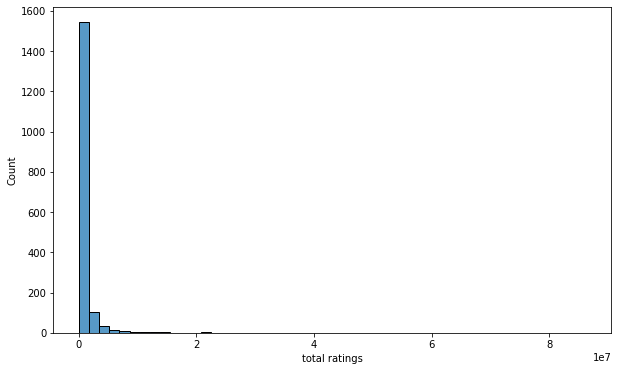

In [128]:
#Histogram with Seaborn

plt.figure(figsize = (10,6))
sns.histplot(df['total ratings'], bins = 50);

In [129]:
#Histogram with Plotly


fig = px.histogram(df, x= 'total ratings', title='Total Ratings of the Games')

fig.show()

- It gives some information about the values but to see outliers let's use boxplot.

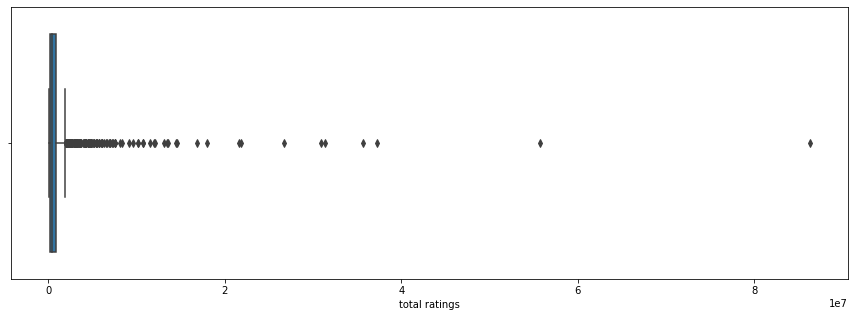

In [131]:
#Boxplot with Seaborn

plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="total ratings");

- Seaborn is more popular than Plotly but we can not get some certain inf about the certain values.

In [133]:
#Boxplot with Plotly

fig = px.box(df, x= 'total ratings', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

- As we have seen in the histogram, quite a lot of the ratings are in the 0 - 500.000 ratings range.
- On the other hand ve have quite a number of outliers, which increases mean and put it further away from the median.
- The difference between mean and the median which is made by outliers from max side another way to say that we have highly right skewed distribution.
- Instead of using mean values, using the meadian is going to make much more sense for further analysis.

## Number of Game Install